In [9]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [11]:
data_path = "test_data_set.csv"

In [12]:
data_raw = pd.read_csv(data_path)

In [13]:
data_raw.shape

(949, 3)

In [14]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 949
Number of columns in data = 3




**Sample data:**

,Title,Tags,Content
0,Two Sum,"Array,Hashtable","Given an array of integers, return indices of ..."
1,Add Two Numbers,"Linked list ,Math",You are given two non-empty linked lists repre...
2,Longest Substring Without Repeating Characters...,"Hash Table,Two pointers,String","Given a string, find the length of the longest..."
3,Median of Two Sorted Arrays,"Array, Binary Search, Divide and Conquer",There are two sorted arrays nums1 and nums2 of...
4,Longest Palindromic Substring,"String, Dynamic Programming","Given a string s, find the longest palindromic..."


In [19]:
from wordcloud import WordCloud,STOPWORDS


In [34]:
tags = data_raw.Tags

In [38]:
tags = tags.dropna()

In [39]:
plt.figure(figsize=(40,25))

<Figure size 2880x1800 with 0 Axes>

<Figure size 2880x1800 with 0 Axes>

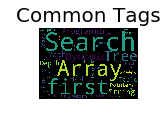

In [45]:
text = tags
tags_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Common Tags",fontsize=20)
plt.imshow(tags_cloud)

In [52]:
##Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data = data_raw.Content.dropna()
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Content'] = data['Content'].apply(stemming)
data.head()
data_raw

KeyError: 'Content'